<a href="https://colab.research.google.com/github/LBMH-lang/LBMH/blob/master/T%C3%A0i_li%E1%BB%87u_k%E1%BB%B9_thu%E1%BA%ADt_v%E1%BB%81_ki%E1%BB%83m_%C4%91%E1%BB%8Bnh_t_b%E1%BA%B1ng_g%C3%B3i_statsmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install  RESEARCHPY

In [ ]:
import researchpy as rp
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

# Tải tập dữ liệu và xem xét các biến ở cấp độ cao.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/blood_pressure.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


# Kiểm tra T bằng cách sử dụng RESEARCHPY

In [ ]:
rp.ttest(group1= df['bp_after'][df['sex'] == 'Male'], group1_name= "Male",
         group2= df['bp_after'][df['sex'] == 'Female'], group2_name= "Female")

(   Variable      N        Mean         SD        SE   95% Conf.    Interval
 0      Male   60.0  155.516667  15.243217  1.967891  151.578926  159.454407
 1    Female   60.0  147.200000  11.742722  1.515979  144.166533  150.233467
 2  combined  120.0  151.358333  14.177622  1.294234  148.795621  153.921046,
               Independent t-test   results
 0  Difference (Male - Female) =     8.3167
 1          Degrees of freedom =   118.0000
 2                           t =     3.3480
 3       Two side test p value =     0.0011
 4      Difference < 0 p value =     0.9995
 5      Difference > 0 p value =     0.0005
 6                   Cohen's d =     0.6112
 7                   Hedge's g =     0.6074
 8               Glass's delta =     0.5456
 9                           r =     0.2945)

# Nếu được lưu trữ dưới dạng các đối tượng Python, chúng sẽ được lưu trữ dưới dạng khung dữ liệu Pandas. Điều này có nghĩa là bất cứ điều gì có thể được thực hiện với khung dữ liệu Pandas truyền thống đều có thể được thực hiện với những kết quả này.

In [ ]:
summary, results = rp.ttest(group1= df['bp_after'][df['sex'] == 'Male'], group1_name= "Male",
                            group2= df['bp_after'][df['sex'] == 'Female'], group2_name= "Female")
print(summary)

   Variable      N        Mean         SD        SE   95% Conf.    Interval
0      Male   60.0  155.516667  15.243217  1.967891  151.578926  159.454407
1    Female   60.0  147.200000  11.742722  1.515979  144.166533  150.233467
2  combined  120.0  151.358333  14.177622  1.294234  148.795621  153.921046


In [ ]:
print(results)

              Independent t-test   results
0  Difference (Male - Female) =     8.3167
1          Degrees of freedom =   118.0000
2                           t =     3.3480
3       Two side test p value =     0.0011
4      Difference < 0 p value =     0.9995
5      Difference > 0 p value =     0.0005
6                   Cohen's d =     0.6112
7                   Hedge's g =     0.6074
8               Glass's delta =     0.5456
9                           r =     0.2945


# Kiểm tra T indepdent bằng cách sử dụng scipy.stats

In [ ]:
stats.ttest_ind(df['bp_after'][df['sex'] == 'Male'],
                df['bp_after'][df['sex'] == 'Female'])

Ttest_indResult(statistic=3.3479506182111387, pvalue=0.0010930222986154283)

# Kiểm tra giả định

# Hai mẫu độc lập

In [ ]:
sampling_difference = df['bp_after'][df['sex'] == 'Male'].values - \
                      df['bp_after'][df['sex'] == 'Female'].values

stats.shapiro(sampling_difference)

(0.98586106300354, 0.7147841453552246)

Một phương pháp kiểm tra phân phối bằng mắt thường là sử dụng biểu đồ xác suất có hoặc không có giá trị tương quan,
, để đánh giá mối tương quan giữa các giá trị quan sát với phân phối lý thuyết được đề cập - trong trường hợp hiện tại, nó sẽ là phân phối Gaussian (hay còn gọi là phân phối chuẩn). Điều này có thể được hoàn thành bằng cách sử dụng phương thức probplot () từ Scipy.stats.

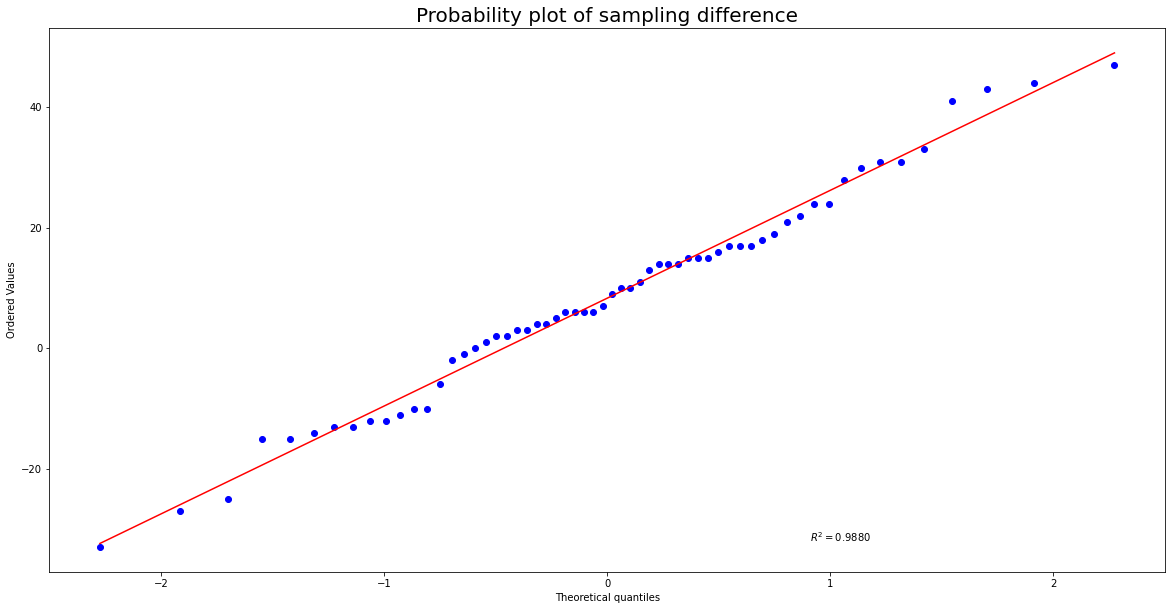

In [ ]:
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(sampling_difference, plot= plt, rvalue= True)
ax.set_title("Probability plot of sampling difference", fontsize= 20)
ax.set

plt.show()

# Tính đồng nhất của phương sai

Một trong những giả thiết là cả hai nhóm đều có phương sai bằng nhau. Một phương pháp để kiểm tra giả định này là kiểm định của Levene về tính đồng nhất của các phương sai. Điều này có thể được hoàn thành bằng cách sử dụng phương thức levene () từ Scipy.stats

In [ ]:
stats.levene(df['bp_after'][df['sex'] == 'Male'],
             df['bp_after'][df['sex'] == 'Female'],
             center= 'mean')

LeveneResult(statistic=5.865854141268659, pvalue=0.01695904277978066)

Phép thử này có ý nghĩa cho thấy các nhóm có lượng biến thiên khác nhau và phép thử t có thể không phải là phương pháp thống kê tốt nhất được sử dụng. Một lần nữa, cũng có thể đáng giá để kiểm tra giả định này một cách trực quan.

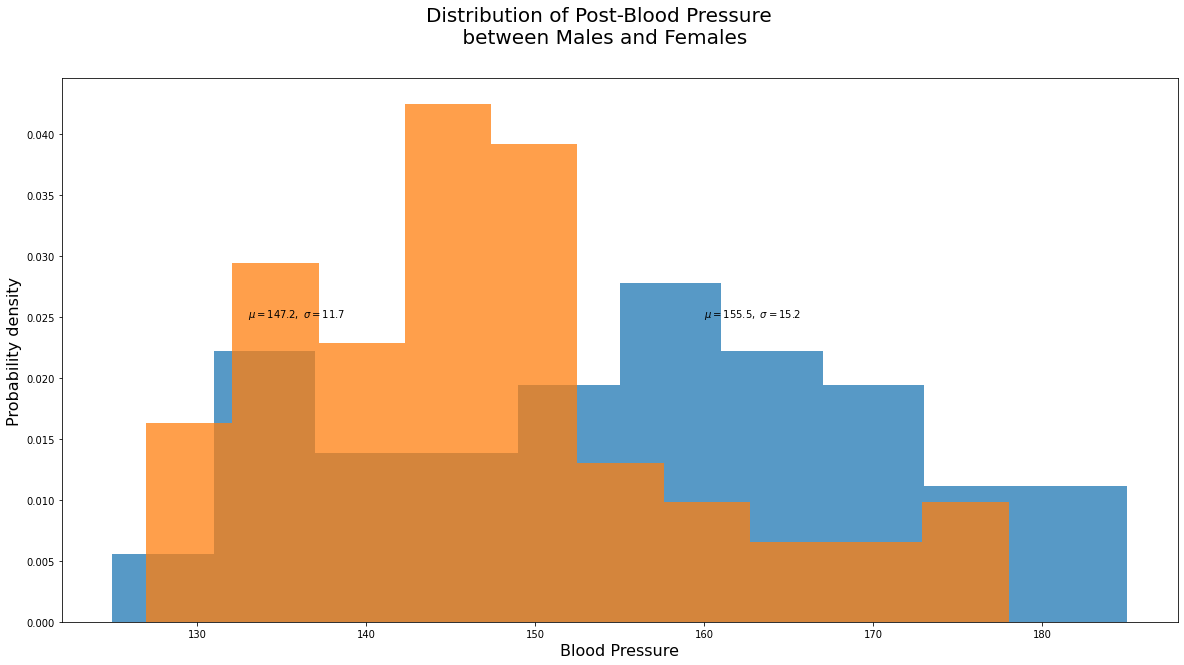

In [ ]:
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(111)


p_bp_male = plt.hist(df['bp_after'][df['sex'] == 'Male'], label= "Male",
                     density= True,
                     alpha=0.75)
p_bp_female = plt.hist(df['bp_after'][df['sex'] == 'Female'], label= "Female",
                       density= True,
                       alpha=0.75)


plt.suptitle("Distribution of Post-Blood Pressure \n between Males and Females", fontsize= 20)
plt.xlabel("Blood Pressure", fontsize= 16)
plt.ylabel("Probability density", fontsize= 16)

plt.text(133, .025,
         f"$\mu= {df['bp_after'][df['sex'] == 'Female'].mean(): .1f}, \ \sigma= {df['bp_after'][df['sex'] == 'Female'].std(): .1f}$")
plt.text(160, .025,
         f"$\mu= {df['bp_after'][df['sex'] == 'Male'].mean(): .1f}, \ \sigma= {df['bp_after'][df['sex'] == 'Male'].std(): .1f}$")


plt.show()
